In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Algorithms
from sklearn.naive_bayes import MultinomialNB
#Model sellection
from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_validate
#evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv(r"C:\\Users\\cvveljanovski\\Desktop\\Exercising Naive Bayes\\Customer_Behaviour.csv")

In [ ]:
df = df.drop(["User ID"], axis = 1)

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


## Lets see the distribution of the values in the features

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\C

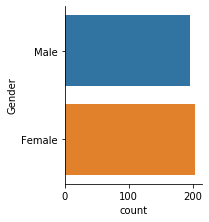

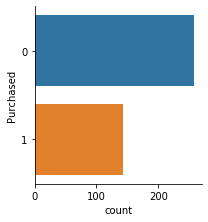

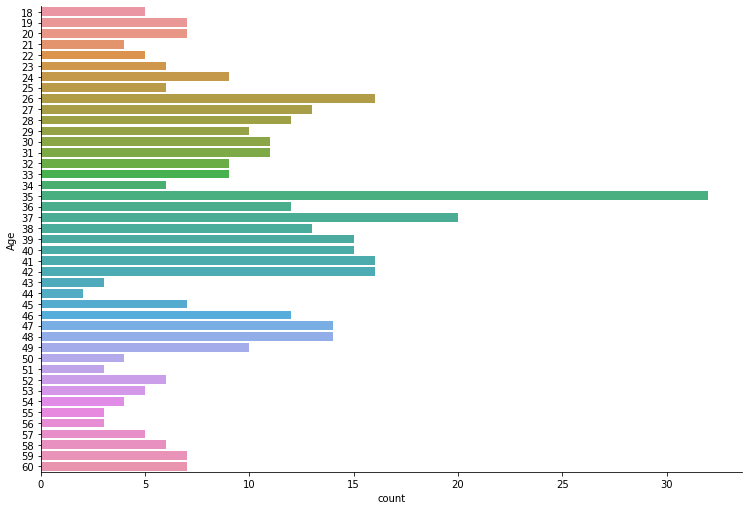

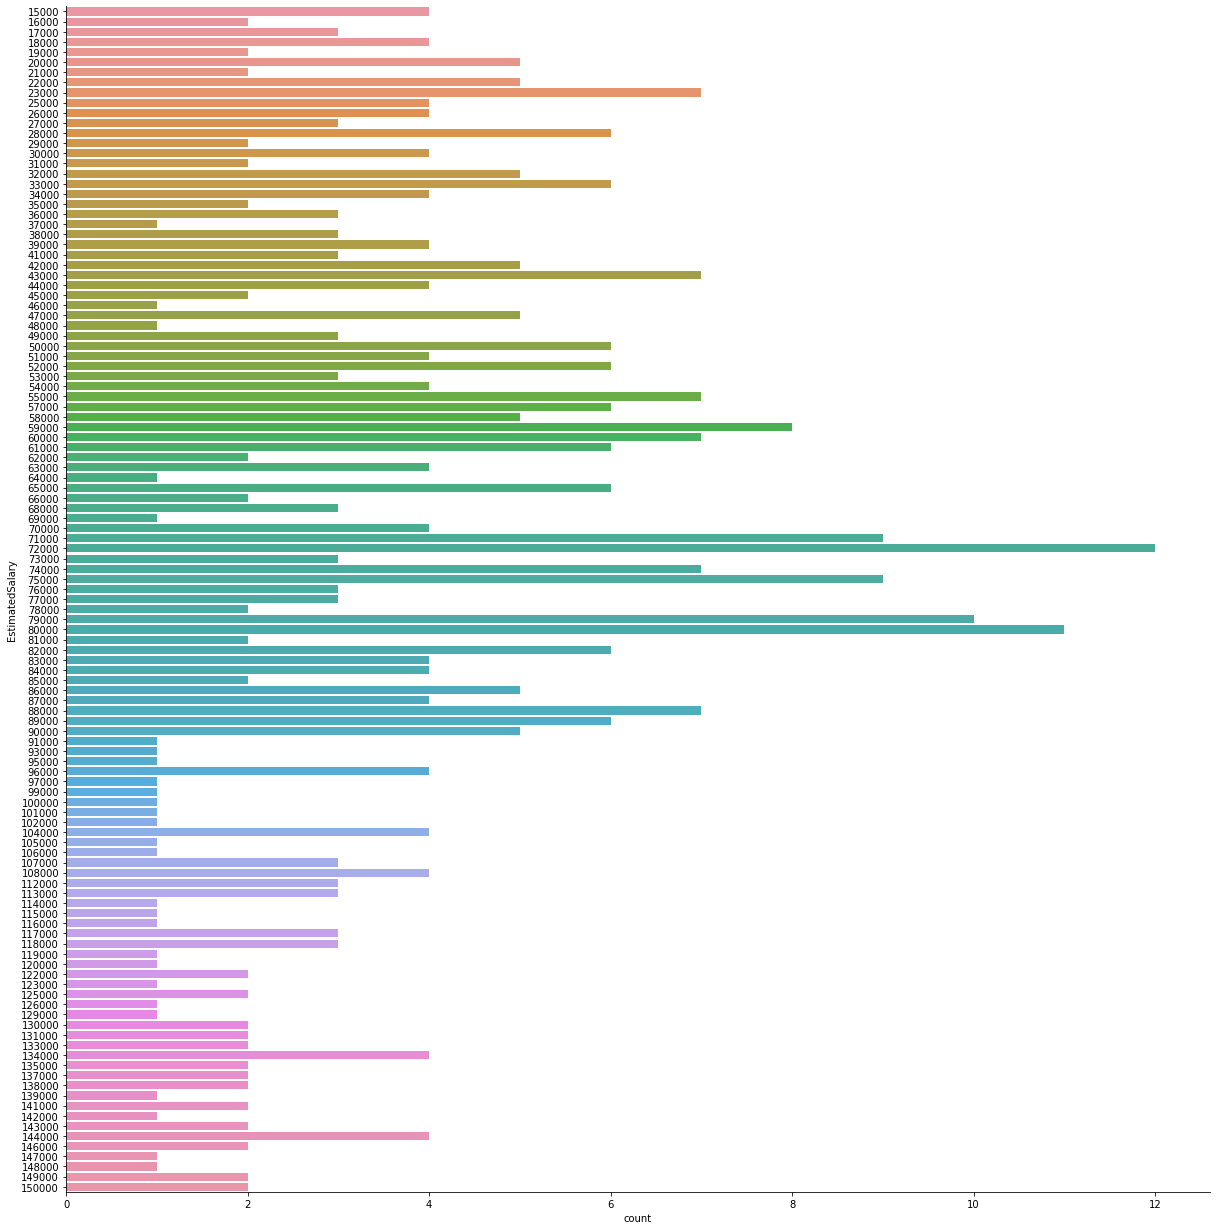

In [38]:
sns.factorplot(  kind="count", y= "Gender", data=df, size = 3)
sns.factorplot(  kind="count", y= "Purchased", data=df, size = 3)
sns.factorplot(  kind="count", y= "Age", data=df,size = 7, aspect = 1.5)
sns.factorplot(  kind="count", y= "EstimatedSalary", data=df,size = 17, aspect = 1)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kd

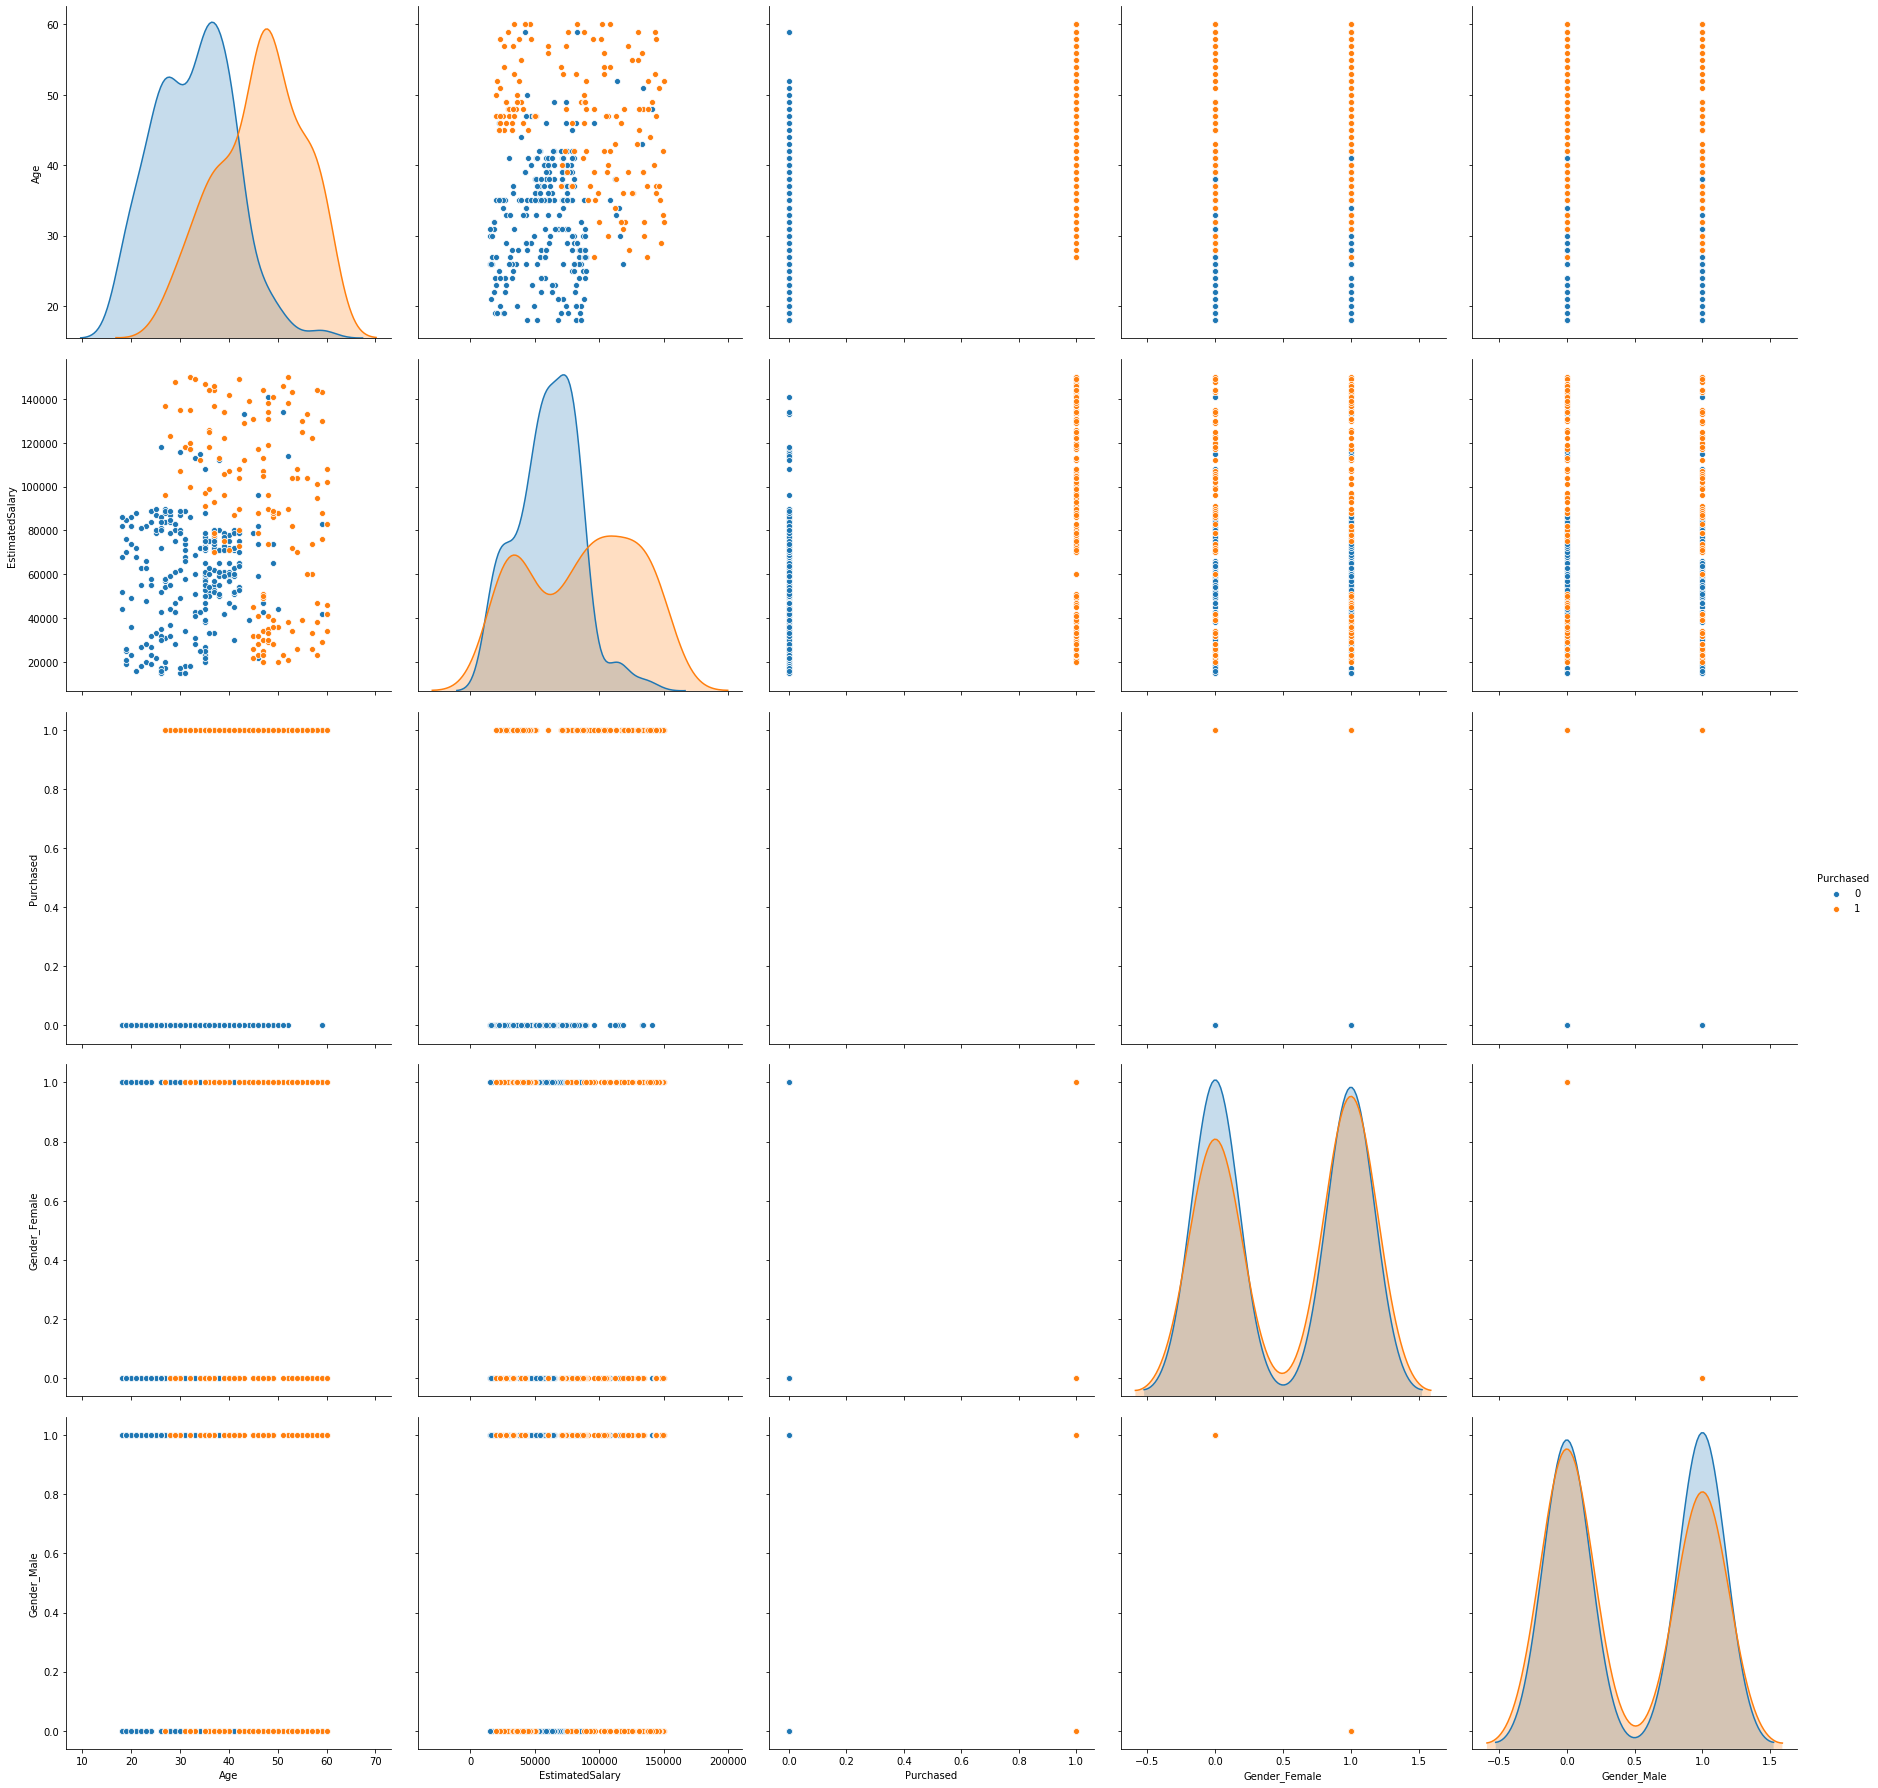

In [126]:
#Multivariate correlation
sns.pairplot(df, hue="Purchased", size = 5)

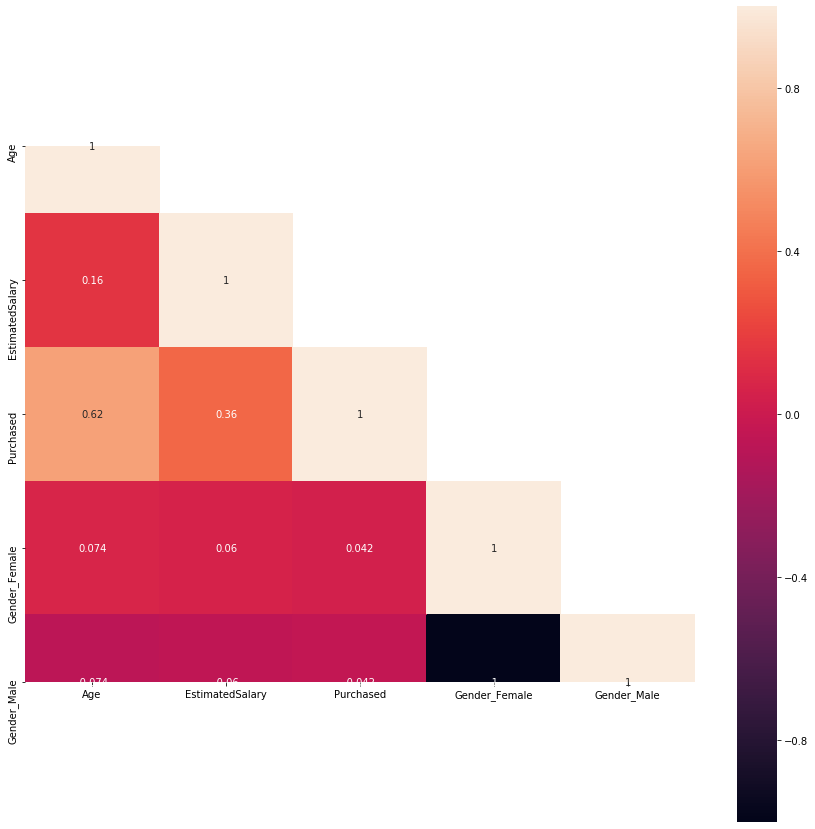

In [133]:
cor_mat = df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(15,15)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

## Lets check for empty values

In [40]:
df.isnull().sum()
#No null values in the dataset are present

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [46]:
## Lets one hot encode the Gender feature
gender = pd.get_dummies(df['Gender'],prefix='Gender') # Take the column Gender and create a dataframe named gender that has 2 columns Male and Female
df=pd.concat([df,gender],axis=1) # Concatenate the df and the gender dataframes
df = df.drop(["Gender"], axis = 1)

In [70]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [71]:
#Lets see which message which titles are the most frequent for each category
df.groupby("Purchased").describe()

Age                                                     \
           count       mean       std   min   25%   50%   75%   max   
Purchased                                                             
0          257.0  32.793774  7.985844  18.0  26.0  34.0  38.0  59.0   
1          143.0  46.391608  8.612172  27.0  39.5  47.0  53.0  60.0   

          EstimatedSalary               ...  Gender_Female      Gender_Male  \
                    count          mean ...            75%  max       count   
Purchased                               ...                                   
0                   257.0  60544.747082 ...            1.0  1.0       257.0   
1                   143.0  86272.727273 ...            1.0  1.0       143.0   

                                                        
               mean       std  min  25%  50%  75%  max  
Purchased                                               
0          0.505837  0.500941  0.0  0.0  1.0  1.0  1.0  
1          0.461538  0.500271  0.0  0.0  0.0  1.0  1.0  

[2 rows x 32 columns]

In [72]:
# We can see that the youngest person to purchase is 27 years and the oldest is 60 years
# Male and female buy the product equally
# More people don't buy the product
# Most people from the data are in their 30s

In [122]:
#Split the dataset into training and test
x_train, x_test, y_train, y_test = train_test_split(df.drop("Purchased",axis=1),df['Purchased'],test_size=0.3, random_state=25)

In [123]:
NB_model=MultinomialNB().fit(x_train, y_train) #train Naive Bayes classifier

In [124]:
NB_predict = naive_bayes_model.predict(x_test)    # test the Naive Bayes model and get prediction

In [125]:
print(classification_report(y_test,NB_predict))  

              precision    recall  f1-score   support

           0       0.73      0.87      0.79        77
           1       0.64      0.42      0.51        43

   micro avg       0.71      0.71      0.71       120
   macro avg       0.69      0.64      0.65       120
weighted avg       0.70      0.71      0.69       120



The classification report is about key metrics in a classification problem.

You'll have precision, recall, f1-score and support for each class you're trying to find.

The recall means "how many of this class you find over the whole number of element of this class"

The precision will be "how many are correctly classified among that class"

The f1-score is the harmonic mean between precision & recall

The support is the number of occurence of the given class in your dataset (so you have 37.5K of class 0 and 37.5K of class 1, which is a really well balanced dataset.

The thing is, precision and recall is highly used for imbalanced dataset because in an highly imbalanced dataset, a 99% accuracy can be meaningless.

I would say that you don't really need to look at these metrics for this problem , unless a given class should absolutely be correctly determined.
This only means your classifier is better to find class 0 over class 1.